# Simulated data

## 1: Implement subroutine generating random data

In [28]:
import numpy as np
import numpy.random as npr
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Code received from Lukas
def generate_expression_data(n_analytes=100, n_samples=2, n_replicates=3, p_regulated=0.2, mean_offset=3.0, var=0.2, diff_var=2.0):
    # Here we follow a convension, The first sample is the reference i.e. have all label 1
    labels = npr.binomial(1, p_regulated, (n_analytes,n_samples-1))
    template = np.hstack((np.zeros((n_analytes,1)),labels))
    
    # We expand the template labels into several replicates
    regulated = np.repeat(template,n_replicates, axis=1)
    
    # If the reading is regulated, offset it with a random offset sampled from the normal distribution 
    offset = regulated*npr.normal(0,diff_var,(n_analytes,1))
    
    # Model a differentexpression level for the different analytes
    expr_level = np.ones((n_analytes,n_samples*n_replicates))*npr.normal(mean_offset,mean_offset,(n_analytes,1))
    
    # add noice for each measurement
    expression = npr.normal(offset+expr_level,var,(n_analytes,n_replicates*n_samples))
    expression = 2**expression
    
    analyte_names = ["a"+str(i+1) for i in range(n_analytes)]
    sample_names = ["s"+str(i+1)+'_'+str(j+1) for i in range(n_samples) for j in range(n_replicates)]
    
    # Create a dataframe for expression values
    expr_df = pd.DataFrame(expression,columns=sample_names,index=analyte_names)
    expr_df.loc["Sample",:] = [i+1 for i in range(n_samples) for j in range(n_replicates)]
    
    # Create a dataframe with answers if the reading was modeled as differential or not
    label_df = pd.DataFrame(template,columns=[i+1 for i in range(n_samples)],index=analyte_names)
                
    return expr_df,label_df

## 2: Generate testset of 10000 analytes under two conditions measured in 3 replicates.

In [3]:
replicates = 4
diff_expr_df, diff_label_df = generate_expression_data(n_analytes=10000, n_samples=2, n_replicates=replicates, p_regulated=0.2)
null_expr_df, null_label_df = generate_expression_data(n_analytes=10000, n_samples=2, n_replicates=replicates, p_regulated=0)


In [4]:
diff_expr_df.head()

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,s2_1,s2_2,s2_3,s2_4,s2_5,s2_6,s2_7,s2_8,s2_9,s2_10
a1,50.015035,44.951846,48.798646,45.472140,45.953309,50.993915,48.045433,53.848928,47.195869,49.144854,25.329963,34.959681,35.917102,38.358656,23.020162,34.994375,32.739265,38.117121,30.921065,33.775397
a2,1.555411,1.758049,2.339836,2.192639,2.032064,1.528734,2.105425,1.736042,2.201358,1.982391,1.864324,1.949188,2.127008,1.672557,2.040442,2.303077,2.069951,2.054735,2.362987,1.491922
a3,20.815256,18.475684,24.023188,17.579137,14.453153,16.979409,17.118799,16.946594,21.030287,21.005696,20.378874,17.994062,20.698988,15.453122,17.436170,14.759887,17.299086,23.775415,16.564288,20.644625
a4,0.131758,0.126430,0.152377,0.160540,0.112974,0.135443,0.178650,0.170810,0.132858,0.135870,0.132406,0.114654,0.154726,0.143356,0.173700,0.153715,0.141229,0.184854,0.135879,0.141868
a5,0.253751,0.285910,0.317251,0.276127,0.263085,0.297235,0.278912,0.278382,0.310257,0.396244,0.266815,0.319951,0.220445,0.290550,0.269583,0.302253,0.257048,0.406633,0.276529,0.207120


## 3: Calculate p-values

Example t-test.

In [5]:
test_res = stats.ttest_ind([1,2,3], [2,3,4])
test_res.pvalue

0.28786413472669081

In [6]:
s1_labels = list()
s2_labels = list()
for i in range(1, replicates+1):
    s1_labels.append("s1_" + str(i))
    s2_labels.append("s2_" + str(i))
   
print(s1_labels)
print(s2_labels)

# s1_labels = ["s1_1", "s1_2", "s1_3", "s1_4", "s1_5"]
# s2_labels = ["s2_1", "s2_2", "s2_3", "s2_4", "s2_5"]
# s1_labels = ["s1_1", "s1_2", "s1_3", "s1_4", "s1_5"]
# s2_labels = ["s2_1", "s2_2", "s2_3", "s2_4", "s2_5"]
features = diff_label_df.index

['s1_1', 's1_2', 's1_3', 's1_4', 's1_5', 's1_6', 's1_7', 's1_8', 's1_9', 's1_10']
['s2_1', 's2_2', 's2_3', 's2_4', 's2_5', 's2_6', 's2_7', 's2_8', 's2_9', 's2_10']


In [7]:
# sub_df = expr_df.iloc[0:5]
# # print(sub_df)
# s1_cols = sub_df[s1_labels]
# print(s1_cols)
# s2_cols = sub_df[s2_labels]
# print(s2_cols)
# print(stats.ttest_ind(s1_cols, s2_cols).pvalue)
# print(stats.ttest_ind(s1_cols, s2_cols, axis=1).pvalue)

In [8]:
diff_test_results = stats.ttest_ind(diff_expr_df.loc[features,s1_labels], diff_expr_df.loc[features,s2_labels], axis=1)
diff_p_vals = diff_test_results.pvalue
print(diff_p_vals)


[  9.69456577e-08   6.86123416e-01   7.88258536e-01 ...,   6.26409082e-01
   4.65001850e-15   9.37840297e-01]


In [9]:
diff_p_vals[0:10]

array([  9.69456577e-08,   6.86123416e-01,   7.88258536e-01,
         6.79805930e-01,   5.27168555e-01,   9.77526303e-01,
         7.40812789e-02,   5.67721562e-01,   1.26775897e-14,
         1.92184729e-11])

In [10]:
null_test_results = stats.ttest_ind(null_expr_df.loc[features,s1_labels], null_expr_df.loc[features,s2_labels], axis=1)
null_p_vals = null_test_results.pvalue

## 4: Implement subroutine for calculating q-value

* Let p_1 <= p_2 <= p_m be ordered p-values
* For a range lambda, say lambda = 0, 0.01, 0.02.., 0.95 calculate: pi0(lambda) = # {p_j > lambda} / m(1-lambda)
* Let f be the natural cubic spline (in our case - average for high p-values)
* Set estimate of pi_0 to be: pi_0 = f(1)
* Calculate q(p(m)) = min((pi_0*m*t)/#{p_i <= t}) = pi_0 * p(m)
* For i = m - 1, m - 2, ..., 1 calculate:
* The estimated q is the ith most significant feaure is q(p(i))

In [11]:
def estimate_pis(pvals):
    
    pi_0_vals = list()
    
    for sub_thres in np.arange(0.01, 0.96, 0.01):
        sub_p = [p for p in pvals if p > sub_thres]
        sub_p_count = len(sub_p)
        m = len(pvals)
        pi_0 = sub_p_count / (m * (1-sub_thres))
        pi_0_vals.append(pi_0)
  
    return pi_0_vals

def estimate_pi_zero(pis, thres):
    
    tot = len(pis)
    start_ind = int(tot * thres)
    sub = pis[start_ind:]
    return np.mean(sub)


### Diff test

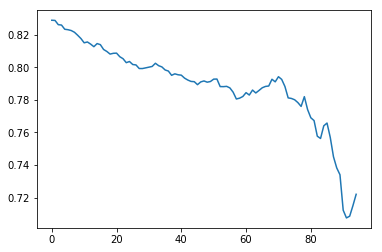

In [12]:
diff_pi_0_vals = estimate_pis(diff_p_vals)
plt.plot(diff_pi_0_vals)
plt.show()

### Null test

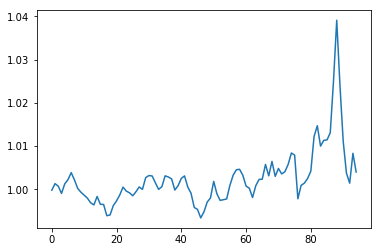

In [13]:
null_pi_0_vals = estimate_pis(null_p_vals)
plt.plot(null_pi_0_vals)
plt.show()

#### q-value calculations

In [14]:
def estimate_q_vals(pvals):
    pi_estimates = estimate_pis(pvals)
    pi_0 = estimate_pi_zero(pi_estimates, 0.75)
    m = len(pvals)
    
    fdr_vals = list()
    for t in sorted(pvals):
#     for i in range(len(pvals)):
        val = pi_0 * m * t / (len(fdr_vals) + 1)
        fdr_vals.append(val)
#         q_vals.append(min(fdr_vals))

    q_vals = list()
    for sub_i in range(1, len(fdr_vals)):
        fdr_slice = fdr_vals[len(fdr_vals) - sub_i:]
        q = min(fdr_slice)
        q_vals.insert(0, q)

    print("pi_0: {}".format(pi_0))
    print("m: {}".format(len(pvals)))
    return q_vals
    



In [15]:
diff_q_vals = estimate_q_vals(diff_p_vals)
null_q_vals = estimate_q_vals(null_p_vals)


pi_0: 0.7563273415733627
m: 10000
pi_0: 1.0094202722112204
m: 10000


In [16]:
print(diff_q_vals[0:10])
print(null_q_vals[0:10])

[1.2038975681395902e-16, 1.2038975681395902e-16, 6.8375215808828368e-16, 7.7249673782700318e-16, 1.4505056795829057e-15, 1.9115720059268856e-15, 1.9151073031423333e-15, 2.1266528450963568e-15, 2.9094370990732899e-15, 3.0966446453417761e-15]
[0.77609950698231334, 0.77609950698231334, 0.77609950698231334, 0.77754535552471515, 0.77754535552471515, 0.77754535552471515, 0.77754535552471515, 0.77754535552471515, 0.77754535552471515, 0.77754535552471515]


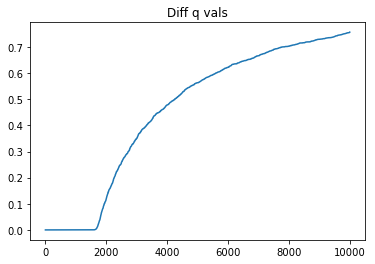

In [17]:
plt.plot(diff_q_vals)
plt.title("Diff q vals")
plt.show()

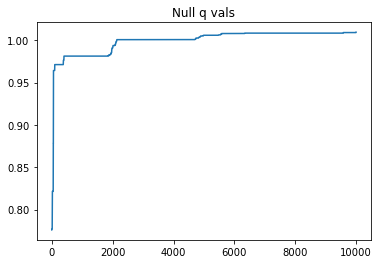

In [18]:
plt.plot(null_q_vals)
plt.title("Null q vals")
plt.show()

## 5: Differential expression genes, on q-threshold

In [19]:
xvals = np.arange(0, 0.5, 0.005)

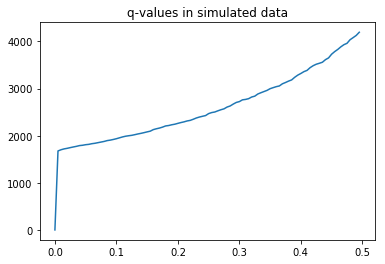

In [20]:
diff_counts = list()
for thres in xvals:
    diff_count = len([q for q in diff_q_vals if q <= thres])
    diff_counts.append(diff_count)
plt.plot(xvals, diff_counts)
plt.title('q-values in simulated data')
plt.show()

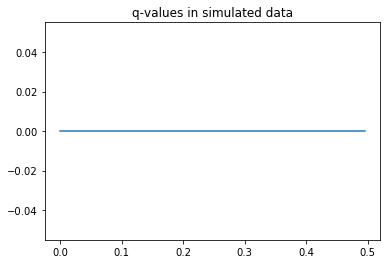

In [21]:
null_counts = list()
for thres in xvals:
    null_count = len([q for q in null_q_vals if q <= thres])
    null_counts.append(null_count)
plt.plot(xvals, null_counts)
plt.title('q-values in simulated data')
plt.show()

# 6: Plot difference between q-values and actual fraction of null statistics

In [22]:
diff_q_vals[0:10]

[1.2038975681395902e-16,
 1.2038975681395902e-16,
 6.8375215808828368e-16,
 7.7249673782700318e-16,
 1.4505056795829057e-15,
 1.9115720059268856e-15,
 1.9151073031423333e-15,
 2.1266528450963568e-15,
 2.9094370990732899e-15,
 3.0966446453417761e-15]

In [23]:
diff_p_vals[0:10]

array([  9.69456577e-08,   6.86123416e-01,   7.88258536e-01,
         6.79805930e-01,   5.27168555e-01,   9.77526303e-01,
         7.40812789e-02,   5.67721562e-01,   1.26775897e-14,
         1.92184729e-11])

In [24]:
def get_true_diff_counts(pvals, labels, xvals):
    
    true_rows = labels.iloc[:,1] == 1
    true_pvals = pvals[true_rows]
    
    below_thres_counts = list()
    for thres in xvals:
        below_thres_count = [p for p in true_pvals if p <= thres]
        below_thres_counts.append(len(below_thres_count))
    
    return below_thres_counts

In [25]:
true_diff_counts = get_true_diff_counts(diff_p_vals, diff_label_df, xvals)

In [26]:
q_estimated_h1_count = list()
for i in range(len(true_diff_counts)):
    diff_count = diff_counts[i]
    x_frac = xvals[i]
    est_actual_diff_count = diff_count - diff_count * x_frac
    q_estimated_h1_count.append(est_actual_diff_count)

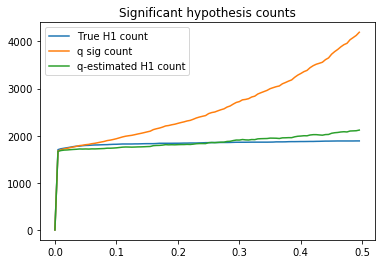

In [27]:
true_counts = plt.plot(xvals, true_diff_counts, label="True H1 count")
q_counts = plt.plot(xvals, diff_counts, label="q sig count")
q_est_true = plt.plot(xvals, q_estimated_h1_count, label="q-estimated H1 count")
plt.legend()
plt.title("Significant hypothesis counts")
plt.show()